In [114]:
# import libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import geopandas as gpd
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [115]:
# import csv files
# The column headers are in row four
mmr_country_ = pd.read_excel(open('data/unicef.xlsx', 'rb'), sheet_name='MMR_country_level', header=4)
regions_ = pd.read_excel(open('data/regions.xlsx', 'rb'), sheet_name='Regional Classification', skipfooter=4)

# Extract the needed columns from data
# extract columns needed from country MMR
mmr_country = mmr_country_[["ISO Code", "2000", "2005", "2010", "2015", "2020"]]
# extract columns needed from Regions
regions = regions_[["ISO Code",	"Country",	"UN Region", "UN Sub Region", "Development Regions", "World Bank Income Groups"]]

    

In [116]:
def draw_map_with_mmr(df):
    '''
    INPUT - schema - pandas dataframe with the schema of countries and MMR
            
    OUTPUT - figure - plotly - shows world map with MMR distribution
    '''
    
    df['Average'] = df.mean(axis=1, numeric_only=True)
    df = df[["Country", "Average"]].copy()
    cat_labels = ["Very Low", "Low", "High", "Very High", "Extremely High"]
    df['Category'] = pd.cut(x=df["Average"], bins=[0, 99, 299, 499, 999, np.inf], labels=cat_labels)
    
    # Merge the world map with your data
    fig = px.choropleth(df, 
                    locations="Country", 
                    locationmode='country names', 
                    color="Category", 
                    hover_name="Country",
                    color_discrete_sequence=px.colors.qualitative.Set2,
                    title="Global MMR Distribution",
                    width=1000, height = 600)

    # Show the plot
    fig.show()

In [117]:
def calculate_percentages(df):
    df = df.drop(columns=['Average'])
    df = df.sum(numeric_only=True)
    df = pd.DataFrame({'Year':df.index, 'MMR':df.values})
    df['percentage'] = (df['MMR']/df['MMR'].sum() * 100).round(2)
    return df

In [119]:
def merge_countries_region(df_country, df_region):
    '''
    INPUT - df_country - pandas dataframe with the schema of countries and MMR
            df_region - pandas dataframe with the schema of countries and other classifications
    OUTPUT - df_country_merged - pandas dataframe of df_country and df_region merged together
    '''
    # extract columns needed from country MMR
    df_country_merged = df_country.merge( regions, on='ISO Code', sort=False)
    df_country_merged = df_country_merged.rename(columns={"ISO Code": "CountryCode", "UN Region":"Region", "UN Sub Region":"SubRegion", "Development Regions":"Development", "World Bank Income Groups":"IncomeGroup"})
    #region_cols = region_cols.rename(columns={"ISO Code": "CountryCode", "UN Region":"Region", "UN Sub Region":"SubRegion", "Development Regions":"Development", "World Bank Income Groups":"IncomeGroup"})

    return df_country_merged
    

In [120]:
def categorize_mmr(df, category):
    '''
    INPUT - df - pandas dataframe with the schema of countries and MMR
            category - string - a pd column name  for groupby
    OUTPUT - df_cat - pandas dataframe after grouping df by category
    '''
    df_cat = df[[category, "2000", "2005", "2010", "2015", "2020"]]
    df_cat = df_cat.groupby(category).sum()
    return df_cat
    

In [121]:
def plot_similar_charts(df1, df2, xlabel, ylabel, title1, title2, kind1, kind2):
    '''
    INPUT - df1 - pandas dataframe to put in the left chart
            df2 - pandas dataframe to put in the right chart
            xlabel - label for x axis in both charts
            ylabel - label for y axis in both charts
            title1 - title for first chart
            title2 - title for second chart
            kind1 - type of chart to plot on the left chart
            kind2 - type of chart to plot on the right chart
            
    OUTPUT - figure - matplotlib figure - shows two charts side by side
    '''
    
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
    df1.plot(kind=kind1, ax=axes[0])
    plt.xticks(rotation=90, horizontalalignment="center")
    axes[0].set_title(title1, fontsize=10)
    axes[0].set_xlabel(xlabel)
    axes[0].set_ylabel(ylabel)


    df2.plot(kind=kind2, ax=axes[1])
    #plt.xticks(rotation=90, horizontalalignment="center")
    plt.xticks(rotation=90, horizontalalignment="center")
    axes[1].set_title(title2, fontsize=10)
    axes[1].set_xlabel(xlabel)
    axes[1].set_ylabel(ylabel)

    plt.show()


### Chart 1: Global distribution of Maternal Mortality Rate
##### This map shows the rate of Maternal Mortality across all countries. There are five categories based on UNICEF categorization. 
- Extremely High: >=1000
- Very High: 500-999
- High: 200-499
- Very Low: 100-299
- Low: <100

We took the average of MMR accross the 5 years in consideration to categorize countries.

/opt/anaconda3/lib/python3.11/site-packages/plotly/express/_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



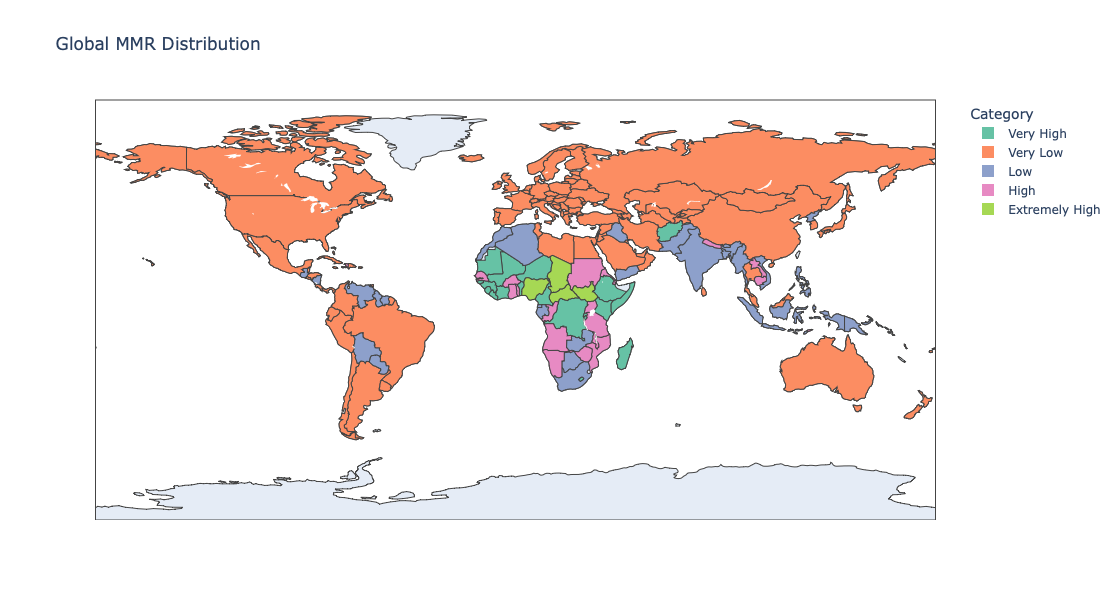

In [122]:
draw_map_with_mmr(mmr_country_)

In [123]:
mmr_country_

,UNICEF Region,ISO Code,Country,2000,2005,2010,2015,2020,Average
0,ROSA,AFG,Afghanistan,1346,1103,899,776,620,948.8
1,ECARO,ALB,Albania,14,11,9,7,8,9.8
2,MENA,DZA,Algeria,159,144,112,89,78,116.4
3,ESARO,AGO,Angola,860,550,367,274,222,454.6
4,LACRO,ATG,Antigua and Barbuda,51,34,31,27,21,32.8
...,...,...,...,...,...,...,...,...,...
180,LACRO,VEN,Venezuela (Bolivarian Republic of),92,95,112,126,259,136.8
181,EAPRO,VNM,Viet Nam,97,78,88,109,124,99.2
182,MENA,YEM,Yemen,275,196,157,164,183,195.0
183,ESARO,ZMB,Zambia,419,309,268,166,135,259.4


#### Conclusion from Chart 1
The map gives a lot of insight about world regions that are still battling with Maternal Mortality. Further analysis will reveal more insights. \
In the next section ahead, we will drill further to see how much improvements have been made over the years.

### Chart 2: Regional Trends As the Year Passes

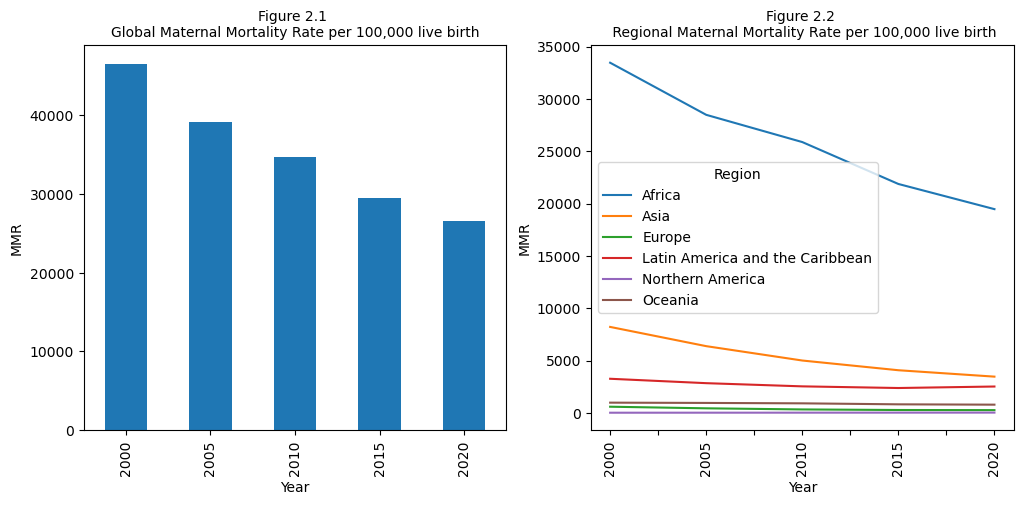

In [124]:
# prepare data for ploting
mmr_country_sums = mmr_country_.sum(numeric_only=True)[["2000", "2005", "2010", "2015", "2020"]]
mmr_country_region = merge_countries_region(mmr_country, regions)
mmr_by_region = categorize_mmr(mmr_country_region, "Region")
mmr_by_region_T = mmr_by_region.T
xlabel = "Year"
ylabel = "MMR"
title1 = "Figure 2.1 \nGlobal Maternal Mortality Rate per 100,000 live birth"
title2 =  "Figure 2.2 \n Regional Maternal Mortality Rate per 100,000 live birth"
plot_similar_charts(mmr_country_sums, mmr_by_region_T, xlabel, ylabel, title1, title2, "bar", "line")



### Conclusion from Charts 2.1 and 2.2
In chart 2.1, maternal mortality rate decreased globally as the year passes by. Many factors could be responsible for this such as;
- advancements in healthcare e.g improvement in prenatal care and child delivery 
- more awareness being created e.g People in remote areas who would choose to deliver their babies at home now opting for hospital delivery
- population decline

#### Chart 2.2
- Northern America has the least MMR and there is a huge difference when compared to the next region with lowest MMR which is Oceanic. The MMR rate in North America seems steady. This tells us that North America has taking the lead in reducing its MMR rate long ago before other regions started improving.
- Africa has the highest MMR and there is a huge difference when compared to the next region with the highest MMR which is Asia. Looks like Africa still has a lot of improvement to do. Even though there has been some steady improvements in MMR in Africa over the years, it looks like where Africa was as at 2020, the other 5 regions had passed it as at year 2000. In section 3, we will drill further into Africa data and see regions and countries that that are lagging behind in Africa.

# Chart 3: MMR Trends In Africa

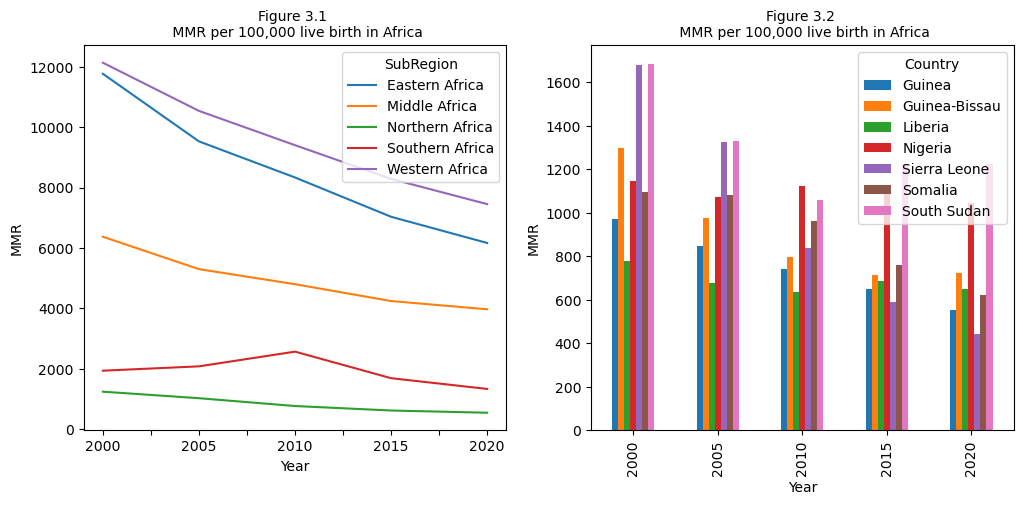

In [125]:
# extract africa data
mmr_country_regions = merge_countries_region(mmr_country, regions)
mmr_in_africa_ = mmr_country_regions[mmr_country_regions['Region']=="Africa"]
mmr_in_africa_ = mmr_in_africa_[["SubRegion", "Country", "2000", "2005", "2010", "2015", "2020"]]
mmr_in_africa  = mmr_in_africa_.groupby("SubRegion")[["2000", "2005", "2010", "2015", "2020"]].sum()

mmr_in_africa_['total'] = mmr_in_africa_.sum(axis=1, numeric_only=True)

# extract 7 countries with the highest MMR in Middle and Eastern Africa
regions_of_interest = ["Eastern Africa", "Western Africa"]
mmr_eastern_western_africa = mmr_in_africa_[mmr_in_africa_['SubRegion'].isin(regions_of_interest)]
mmr_eastern_western_africa = mmr_eastern_western_africa.sort_values(by='total', ascending=False)

mmr_in_africa_top7 = mmr_eastern_western_africa[:7]
mmr_in_africa_top7 = mmr_in_africa_top7.groupby('Country')[["2000", "2005", "2010", "2015", "2020"]].sum()

# prepare data for ploting
mmr_in_africa_T = mmr_in_africa.T
mmr_in_africa_top7_T = mmr_in_africa_top7.T

xlabel = "Year"
ylabel = "MMR"
title1 = "Figure 3.1 \n MMR per 100,000 live birth in Africa"
title2 =  "Figure 3.2 \n MMR per 100,000 live birth in Africa"
plot_similar_charts(mmr_in_africa_T, mmr_in_africa_top7_T, xlabel, ylabel, title1, title2, "line", "bar")


### Conclusion from Charts 3.1 and 3.2
#### Chart 4.1
- Southern Africa has the least MMR in Africa followed by Northern Africa and Western Africa. Middle African and Eastern Africa seems to have a high MMR between year 2000 and 2020. As at year 2020, these two regions (Middle African and Eastern Africa) were not were Southern and Northern Africa were in year 2000. Western Africa seems to have made a lot of improvement in reducing MMR rate over the years as figure 3.1 shows a rapid decline in MMR rate from year 2000 to 2020. Since Middle and Eastern Africa seems to lag behind, we drilled further to see the top 5 countries with high MMR in both regions.
#### Chart 4.2
- The chart shows the two countries in Middle Africa with a high MMR, Sao Tome and Principe and Cameroon. These two countries have a wide gap when compared to the other three regions in Eastern Africa.
- From the chart, we can conclude that Middle Africa needs a lot of improvement with maternal mortality.

# Chart 4: MMR Trends By Development and Income

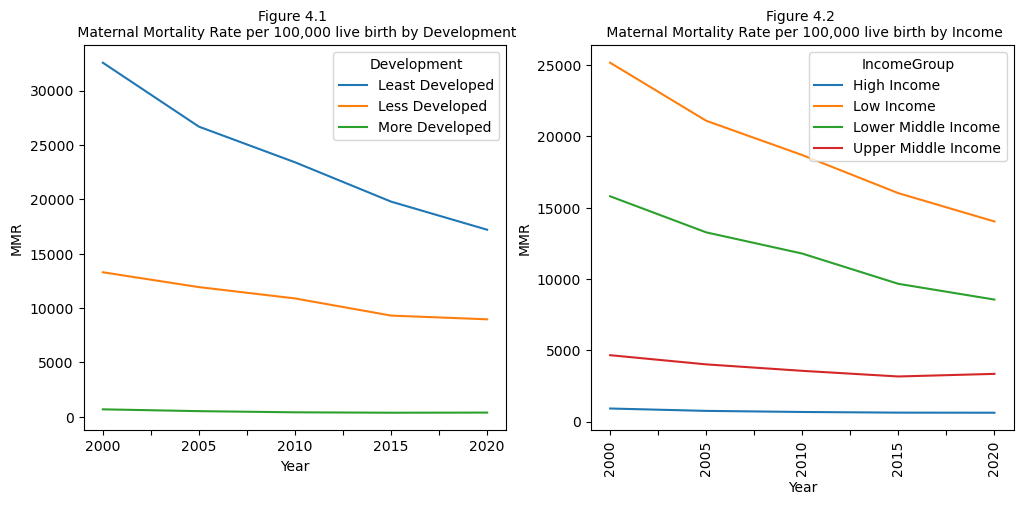

In [126]:
# prepare data for ploting
mmr_country_regions = merge_countries_region(mmr_country, regions)
mmr_by_development = categorize_mmr(mmr_country_regions, "Development")
mmr_by_income = categorize_mmr(mmr_country_regions, "IncomeGroup")

mmr_by_development_T = mmr_by_development.T
mmr_by_inc_T = mmr_by_income.T
xlabel = "Year"
ylabel = "MMR"
title1 = "Figure 4.1 \n Maternal Mortality Rate per 100,000 live birth by Development"
title2 =  "Figure 4.2 \n Maternal Mortality Rate per 100,000 live birth by Income"
plot_similar_charts(mmr_by_development_T, mmr_by_inc_T, xlabel, ylabel, title1, title2, "line", "line")



In [127]:
mmr_country_development = merge_countries_region(mmr_country_, regions_)
mmr_by_region = categorize_mmr(mmr_country_region, "Region")
mmr_by_region_T = mmr_by_region.T

### Conclusion from Charts 4.1 and 4.2
#### Chart 4.1
- The chart shows the impact of development on MMR. More developed countries have low MMR and least developed countries have the highest MMR. One noticeable insight is the margin between developed and less developed counrties. Even though both less developed and least developed countries have reduced their MMR rates, there is still a wide gap when compared with developed countries. What the chart shows fits into a usual assumption that developed countries have better healthcare and are thus able to reduce their MMR.
#### Chart 4.2
- The chart shows the impact of income on MMR. High income groups has the lowest MMR, followed by upper middle income. Low income group hads the highest MMR.   What the chart shows fits into a usual assumption that countries with higher income rate have better healthcare and are thus able to reduce their MMR.

#### Predictive Analysis
Given MMR data for the 5 years, we would predict the income level and development level of a country.

#### IncomeGroup Predictive Analysis

In [88]:
# extract the data needed for analysis income prediction based on MMR data
# we need MMR for 2000, 2005, 2010, 2015, 2020 and IncomeGroup
mmr_country_regions = merge_countries_region(mmr_country, regions)
mmr_with_income = mmr_country_regions[[ "2000", "2005", "2010", "2015", "2020", "IncomeGroup"]]
X = mmr_with_income[['2000', '2005', '2010', '2015', '2020']]
y = mmr_with_income['IncomeGroup']

# Step 2: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the model
model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
model.fit(X_train, y_train)
# Step 4: Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.625
Classification Report:
                      precision    recall  f1-score   support

        High Income       0.69      0.85      0.76        13
         Low Income       0.60      0.90      0.72        10
Lower Middle Income       0.54      0.47      0.50        15
Upper Middle Income       0.67      0.44      0.53        18

           accuracy                           0.62        56
          macro avg       0.62      0.66      0.63        56
       weighted avg       0.63      0.62      0.61        56

Confusion Matrix:
 [[11  0  0  2]
 [ 0  9  1  0]
 [ 1  5  7  2]
 [ 4  1  5  8]]


#### Country Development Predictive Analysis

In [89]:
# extract the data needed for analysis income prediction based on MMR data
# we need MMR for 2000, 2005, 2010, 2015, 2020 and IncomeGroup
mmr_country_regions = merge_countries_region(mmr_country, regions)
mmr_with_income = mmr_country_regions[[ "2000", "2005", "2010", "2015", "2020", "Development"]]
X = mmr_with_income[['2000', '2005', '2010', '2015', '2020']]
y = mmr_with_income['Development']

# Step 2: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 3: Train the model
model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
model.fit(X_train, y_train)
# Step 4: Evaluate the model
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8035714285714286
Classification Report:
                  precision    recall  f1-score   support

Least Developed       0.74      0.93      0.82        15
 Less Developed       0.82      0.72      0.77        25
 More Developed       0.87      0.81      0.84        16

       accuracy                           0.80        56
      macro avg       0.81      0.82      0.81        56
   weighted avg       0.81      0.80      0.80        56

Confusion Matrix:
 [[14  1  0]
 [ 5 18  2]
 [ 0  3 13]]
